In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

In [0]:
env = gym.make("FrozenLake-v0")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 10000
learning_rate = 0.1
max_steps = 99
discount = 0.94
epsilon = 1.0
epsilon_min = 0.1
epsilon_max = 1.0
decay_rate = 0.001

In [0]:
q1_table = np.zeros((obs_num, action_num))
q2_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [10]:
rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q1_table[state,:] + q1_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    # Update q-table
    a1_max = np.argmax(q1_table[new_state, :])
    a2_max = np.argmax(q2_table[new_state, :])

    if random.uniform(0,1) > 0.5:
      q1_table[state, action] = q1_table[state, action] + learning_rate * (reward + 
                  discount * q2_table[new_state, a1_max] - q1_table[state, action])
    else:
      q2_table[state, action] = q2_table[state, action] + learning_rate * (reward + 
                  discount * q1_table[new_state, a2_max] - q2_table[state, action])
    state = new_state

    cumul_rewards += reward
    if reward > 0:
      steps_till_success.append(step + 1)

    if done == True:
      break

  if cumul_rewards < 1:
    steps_till_success.append(100)
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  rewards.append(cumul_rewards)

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')
print(f'Min step to success: {min(steps_till_success)}')

Average reward:0.2369
Min step to success: 6


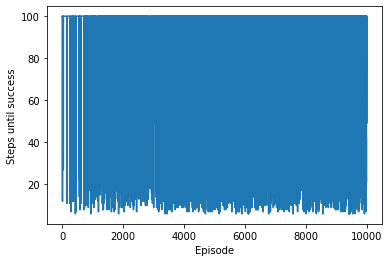

In [11]:
plt.plot(steps_till_success)
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

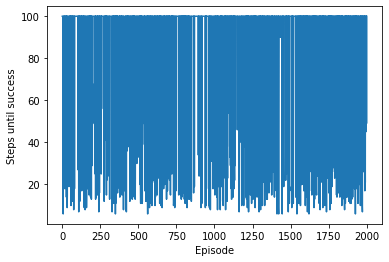

In [12]:
plt.plot(steps_till_success[7999:10000])
plt.xlabel('Episode')
plt.ylabel('Steps until success')
plt.show()

In [13]:
q_table = q1_table + q2_table

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step + 1)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 39
****************************************************
EPISODE  1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 66
****************************************************
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 19
****************************************************
EPISODE  3
  (Right)
SFFF
FHFH
FFFH
HFFG
Number of steps 29
****************************************************
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 38


In [14]:
total_reward = 0

for episode in range(100):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
            break
        state = new_state
env.close()

print(f'Successful runs out of 100: {total_reward}')

Successful runs out of 100: 78.0
